In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

In [60]:
df = pd.read_csv("survey.csv")

In [61]:
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27/08/14 11:29,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,27/08/14 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,27/08/14 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,27/08/14 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,27/08/14 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,12/09/15 11:17,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,26/09/15 01:07,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,07/11/15 12:36,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,30/11/15 21:25,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [62]:
df.shape

(1259, 27)

In [63]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [64]:
df=df.drop(columns=["comments", "Country", "state","Timestamp"])

In [65]:
df.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [66]:
df['self_employed'] = df['self_employed'].replace({None:'No'})
df['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [67]:
df['work_interfere'] = df['work_interfere'].replace({None:"Don't know"})
df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', "Don't know"],
      dtype=object)

In [68]:
df.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [69]:
df.duplicated().sum()

4

In [70]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [71]:
df['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [72]:
df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', "Don't know"],
      dtype=object)

In [73]:
df['Age'].describe()

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

In [74]:
df['Gender']=df['Gender'].str.lower()
df['Gender'].replace({'male': 'Male', 
                         'male ': 'Male',
                         'female': 'Female', 
                         'female ': 'Female',
                         'f': 'Female', 
                         'm': 'Male', 
                         'make': 'Male', 
                         'woman': 'Female', 
                         'female (cis)': 'Female',
                        'man': 'Male',
                        'mail': 'Male',
                        'maile': 'Male',
                        'male cis': 'Male',
                        'male (cis)': 'Male',
                        'femail': 'Female',
                        'femake': 'Female',
                        'cis female': 'Female',
                        'cis man': 'Male',
                        'cis male': 'Male',
                        'malr': 'Male',
                        'mal': 'Male',
                        'cis-female/femme': 'Female',
                        'msle': 'Male',
                        'male-ish': 'Male',
                        'female (trans)': 'Female',
                        "trans-female": "Trans", 
                         "something kinda male?": "Trans", 
                         "queer/she/they": "Trans", 
                         "non-binary": "Trans",
                         "nah": "Trans", 
                         "all": "Trans", 
                         "enby": "Trans", 
                         "fluid": "Trans", 
                         "genderqueer": "Trans", 
                         "androgyne": "Trans", 
                         "agender": "Trans", 
                         "male leaning androgynous": "Trans", 
                         "guy (-ish) ^_^": "Trans", 
                         "trans woman": "Trans", 
                         "neuter": "Trans", 
                         "female (trans)": "Trans", 
                         "queer": "Trans", 
                         "ostensibly male, unsure what that really means": "Trans"}, inplace=True)


In [75]:
lst = ['a little about you', 'p']
df = df[~df['Gender'].isin(lst)]
df['Gender'].unique()

array(['Female', 'Male', 'Trans'], dtype=object)

<AxesSubplot:>

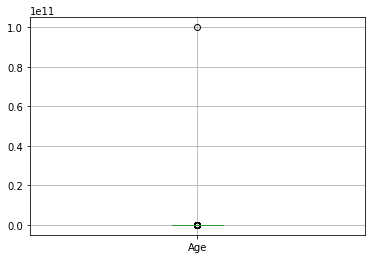

In [76]:
df.plot.box(grid='True')

In [77]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df.loc[(df['Age']<18) | (df['Age']>150), "Age"]=df['Age'].median()
df['Age'].describe().transpose()

count    1257.000000
mean       32.071599
std         7.271222
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

In [78]:
df.columns


Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [79]:
df['family_history'].unique()

array(['No', 'Yes'], dtype=object)

In [80]:
df['treatment'].unique()

array(['Yes', 'No'], dtype=object)

In [81]:
df['remote_work'].unique()

array(['No', 'Yes'], dtype=object)

In [82]:
df['tech_company'].unique()

array(['Yes', 'No'], dtype=object)

In [83]:
df['benefits'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [84]:
df['care_options'].unique()

array(['Not sure', 'No', 'Yes'], dtype=object)

In [85]:
df['wellness_program'].unique()

array(['No', "Don't know", 'Yes'], dtype=object)

In [86]:
df['seek_help'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [87]:
df['anonymity'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [88]:
df['leave'].unique()

array(['Somewhat easy', "Don't know", 'Somewhat difficult',
       'Very difficult', 'Very easy'], dtype=object)

In [89]:
df['mental_health_consequence'].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

In [90]:
df['phys_health_consequence'].unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

In [91]:
df['coworkers'].unique()

array(['Some of them', 'No', 'Yes'], dtype=object)

In [92]:
df['supervisor'].unique()

array(['Yes', 'No', 'Some of them'], dtype=object)

In [93]:
df['mental_health_interview'].unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

In [94]:
df['phys_health_interview'].unique()

array(['Maybe', 'No', 'Yes'], dtype=object)

In [95]:
df['mental_vs_physical'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [96]:
df['supervisor'].unique()

array(['Yes', 'No', 'Some of them'], dtype=object)

In [97]:
df['obs_consequence'].unique()

array(['No', 'Yes'], dtype=object)

In [98]:
df['no_employees'].unique()

array(['Jun-25', 'More than 1000', '26-100', '100-500', '01-May',
       '500-1000'], dtype=object)

In [99]:
df.loc[(df.no_employees == "26-100") | (df.no_employees == "100-500") | (df.no_employees == "500-1000"), 'no_employees'] = "26-1000"
df.loc[(df.no_employees == "1-5") | (df.no_employees == "6-25") | (df.no_employees == "Jun-25") | (df.no_employees == "01-May"), 'no_employees'] = "1-25"


In [100]:
df['no_employees'].unique()

array(['1-25', 'More than 1000', '26-1000'], dtype=object)

In [101]:
df.to_csv(r'cleaned_survey.csv', index=False)

# Encoding

In [102]:
encoder = LabelEncoder()
for col in df.columns:
    if col != 'Age':
        df[col] = encoder.fit_transform(df[col])
        print({index : label for index, label in enumerate(encoder.classes_)})

{0: 'Female', 1: 'Male', 2: 'Trans'}
{0: 'No', 1: 'Yes'}
{0: 'No', 1: 'Yes'}
{0: 'No', 1: 'Yes'}
{0: "Don't know", 1: 'Never', 2: 'Often', 3: 'Rarely', 4: 'Sometimes'}
{0: '1-25', 1: '26-1000', 2: 'More than 1000'}
{0: 'No', 1: 'Yes'}
{0: 'No', 1: 'Yes'}
{0: "Don't know", 1: 'No', 2: 'Yes'}
{0: 'No', 1: 'Not sure', 2: 'Yes'}
{0: "Don't know", 1: 'No', 2: 'Yes'}
{0: "Don't know", 1: 'No', 2: 'Yes'}
{0: "Don't know", 1: 'No', 2: 'Yes'}
{0: "Don't know", 1: 'Somewhat difficult', 2: 'Somewhat easy', 3: 'Very difficult', 4: 'Very easy'}
{0: 'Maybe', 1: 'No', 2: 'Yes'}
{0: 'Maybe', 1: 'No', 2: 'Yes'}
{0: 'No', 1: 'Some of them', 2: 'Yes'}
{0: 'No', 1: 'Some of them', 2: 'Yes'}
{0: 'Maybe', 1: 'No', 2: 'Yes'}
{0: 'Maybe', 1: 'No', 2: 'Yes'}
{0: "Don't know", 1: 'No', 2: 'Yes'}
{0: 'No', 1: 'Yes'}


In [103]:
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,0,0,1,2,0,0,1,2,...,2,2,1,1,1,2,1,0,2,0
1,44,1,0,0,0,3,2,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32,1,0,0,0,3,0,0,1,1,...,0,1,1,1,2,2,2,2,1,0
3,31,1,0,1,1,2,1,0,1,1,...,1,1,2,2,1,0,0,0,1,1
4,31,1,0,0,0,1,1,1,1,2,...,0,0,1,1,1,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,1,0,0,1,0,1,0,1,1,...,0,2,1,1,1,1,1,1,0,0
1255,32,1,0,1,1,2,1,1,1,2,...,2,1,1,1,1,2,1,1,2,0
1256,34,1,0,1,1,4,2,0,1,2,...,0,1,2,2,0,0,1,1,1,0
1257,46,0,0,0,0,0,1,1,1,1,...,0,0,2,1,0,0,1,1,1,0


In [104]:
df.describe()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,...,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000
mean,32.071599,0.818616,0.114558,0.389817,0.505171,2.287987,0.866348,0.297534,0.818616,1.053302,...,0.645187,1.406523,0.851233,0.829753,0.970565,1.096261,0.868735,0.715990,0.813047,0.144789
std,7.271222,0.422915,0.318615,0.487903,0.500172,1.595612,0.751615,0.457355,0.385490,0.836769,...,0.907222,1.506162,0.767150,0.485102,0.619425,0.844310,0.425446,0.722483,0.833736,0.352028
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,31.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,36.000000,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000
max,72.000000,2.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000,2.000000,...,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [105]:
df.corr()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
Age,1.000000,0.057562,0.072407,0.009407,0.073455,0.036994,0.109994,0.146096,-0.057569,0.154961,...,0.024493,-0.009857,0.026604,-0.052746,-0.007133,0.009511,0.062750,-0.022345,-0.011843,0.070909
Gender,0.057562,1.000000,0.042066,-0.127802,-0.149882,-0.088889,-0.048774,-0.000668,0.061751,-0.094150,...,-0.020538,0.037107,0.032101,0.027879,0.049506,0.066775,-0.039508,-0.014994,-0.008186,-0.042719
self_employed,0.072407,0.042066,1.000000,0.004437,0.016264,0.036850,-0.344948,0.312281,0.078562,-0.055771,...,0.102170,0.173311,0.024177,0.018109,0.069544,0.032966,-0.018195,-0.028025,0.134638,0.072052
family_history,0.009407,-0.127802,0.004437,1.000000,0.376714,0.323058,0.031458,0.011448,-0.047080,0.126531,...,0.060902,0.019289,0.025304,-0.001948,-0.004154,0.001608,0.039583,0.036510,0.038376,0.120771
treatment,0.073455,-0.149882,0.016264,0.376714,1.000000,0.615657,0.029372,0.024593,-0.032295,0.224767,...,0.140905,0.059034,0.027943,-0.012776,0.066022,-0.037944,0.094859,0.049234,0.060552,0.154008
work_interfere,0.036994,-0.088889,0.036850,0.323058,0.615657,1.000000,-0.009041,0.035232,0.006033,0.134592,...,0.064044,0.050966,0.061045,-0.019925,0.004556,-0.099787,0.100299,-0.016706,0.047686,0.135488
no_employees,0.109994,-0.048774,-0.344948,0.031458,0.029372,-0.009041,1.000000,-0.215432,-0.243114,0.211353,...,0.024977,-0.163662,0.013818,-0.025333,-0.121325,-0.103918,0.099463,0.047338,-0.050069,0.061159
remote_work,0.146096,-0.000668,0.312281,0.011448,0.024593,0.035232,-0.215432,1.000000,0.130228,-0.064357,...,-0.006332,0.095886,0.051372,-0.015531,0.078716,0.022677,-0.036445,-0.018747,0.033242,-0.045254
tech_company,-0.057569,0.061751,0.078562,-0.047080,-0.032295,0.006033,-0.243114,0.130228,1.000000,-0.046520,...,-0.052128,0.046195,0.000218,0.064646,0.074318,0.048796,-0.043344,-0.033602,0.028178,-0.064468
benefits,0.154961,-0.094150,-0.055771,0.126531,0.224767,0.134592,0.211353,-0.064357,-0.046520,1.000000,...,0.335376,0.063023,-0.012443,-0.032547,-0.009259,0.024286,0.033088,0.022426,0.137549,0.065678


# Feature Extraction

In [106]:
x=df.drop(columns=["treatment"])
y=df.drop(columns=[col for col in  df.columns if col != "treatment" ])
x

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,0,0,2,0,0,1,2,1,...,2,2,1,1,1,2,1,0,2,0
1,44,1,0,0,3,2,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32,1,0,0,3,0,0,1,1,0,...,0,1,1,1,2,2,2,2,1,0
3,31,1,0,1,2,1,0,1,1,2,...,1,1,2,2,1,0,0,0,1,1
4,31,1,0,0,1,1,1,1,2,0,...,0,0,1,1,1,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,1,0,0,0,1,0,1,1,0,...,0,2,1,1,1,1,1,1,0,0
1255,32,1,0,1,2,1,1,1,2,2,...,2,1,1,1,1,2,1,1,2,0
1256,34,1,0,1,4,2,0,1,2,2,...,0,1,2,2,0,0,1,1,1,0
1257,46,0,0,0,0,1,1,1,1,2,...,0,0,2,1,0,0,1,1,1,0


In [107]:
y

,treatment
0,1
1,0
2,0
3,1
4,0
...,...
1254,1
1255,1
1256,1
1257,0


In [108]:
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 

featureScores

,Feature,Score
0,Age,11.171852
1,Gender,6.164750
2,self_employed,0.294405
3,family_history,108.847894
4,work_interfere,529.746606
5,no_employees,0.706565
6,remote_work,0.534055
7,tech_company,0.237802
8,benefits,42.180521
9,care_options,54.543869


In [109]:
featureScores.nlargest(21,'Score')

,Feature,Score
4,work_interfere,529.746606
3,family_history,108.847894
9,care_options,54.543869
8,benefits,42.180521
12,anonymity,31.811538
21,obs_consequence,25.497379
0,Age,11.171852
13,leave,7.059740
1,Gender,6.164750
11,seek_help,5.083570


In [113]:
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=12)
fit = bestfeatures.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 

#featureScores

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [112]:
featureScores.nlargest(21,'Score')

,Feature,Score
4,work_interfere,0.268104
3,family_history,0.059838
12,anonymity,0.039565
8,benefits,0.039353
1,Gender,0.036575
0,Age,0.026860
9,care_options,0.026403
14,mental_health_consequence,0.024076
13,leave,0.017631
7,tech_company,0.012665
